# Sesi 9: intro to computer vision

In [1]:
#download cat image
!wget https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg

--2024-02-16 14:27:57--  https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279603 (273K) [image/jpeg]
Saving to: ‘Cat03.jpg’

Cat03.jpg           100%[===================>] 273.05K   336KB/s    in 0.8s    

2024-02-16 14:27:58 (336 KB/s) - ‘Cat03.jpg’ saved [279603/279603]



In [2]:
import cv2

#read image
img = cv2.imread('Cat03.jpg')

In [3]:
import matplotlib.pyplot as plt

def imshow(img, channel=3):
    plt.figure(figsize=(20,20))
    if channel == 3:
        plt.imshow(img[:,:,::-1])
    else:
        plt.imshow(img, cmap='gray')
    plt.show()

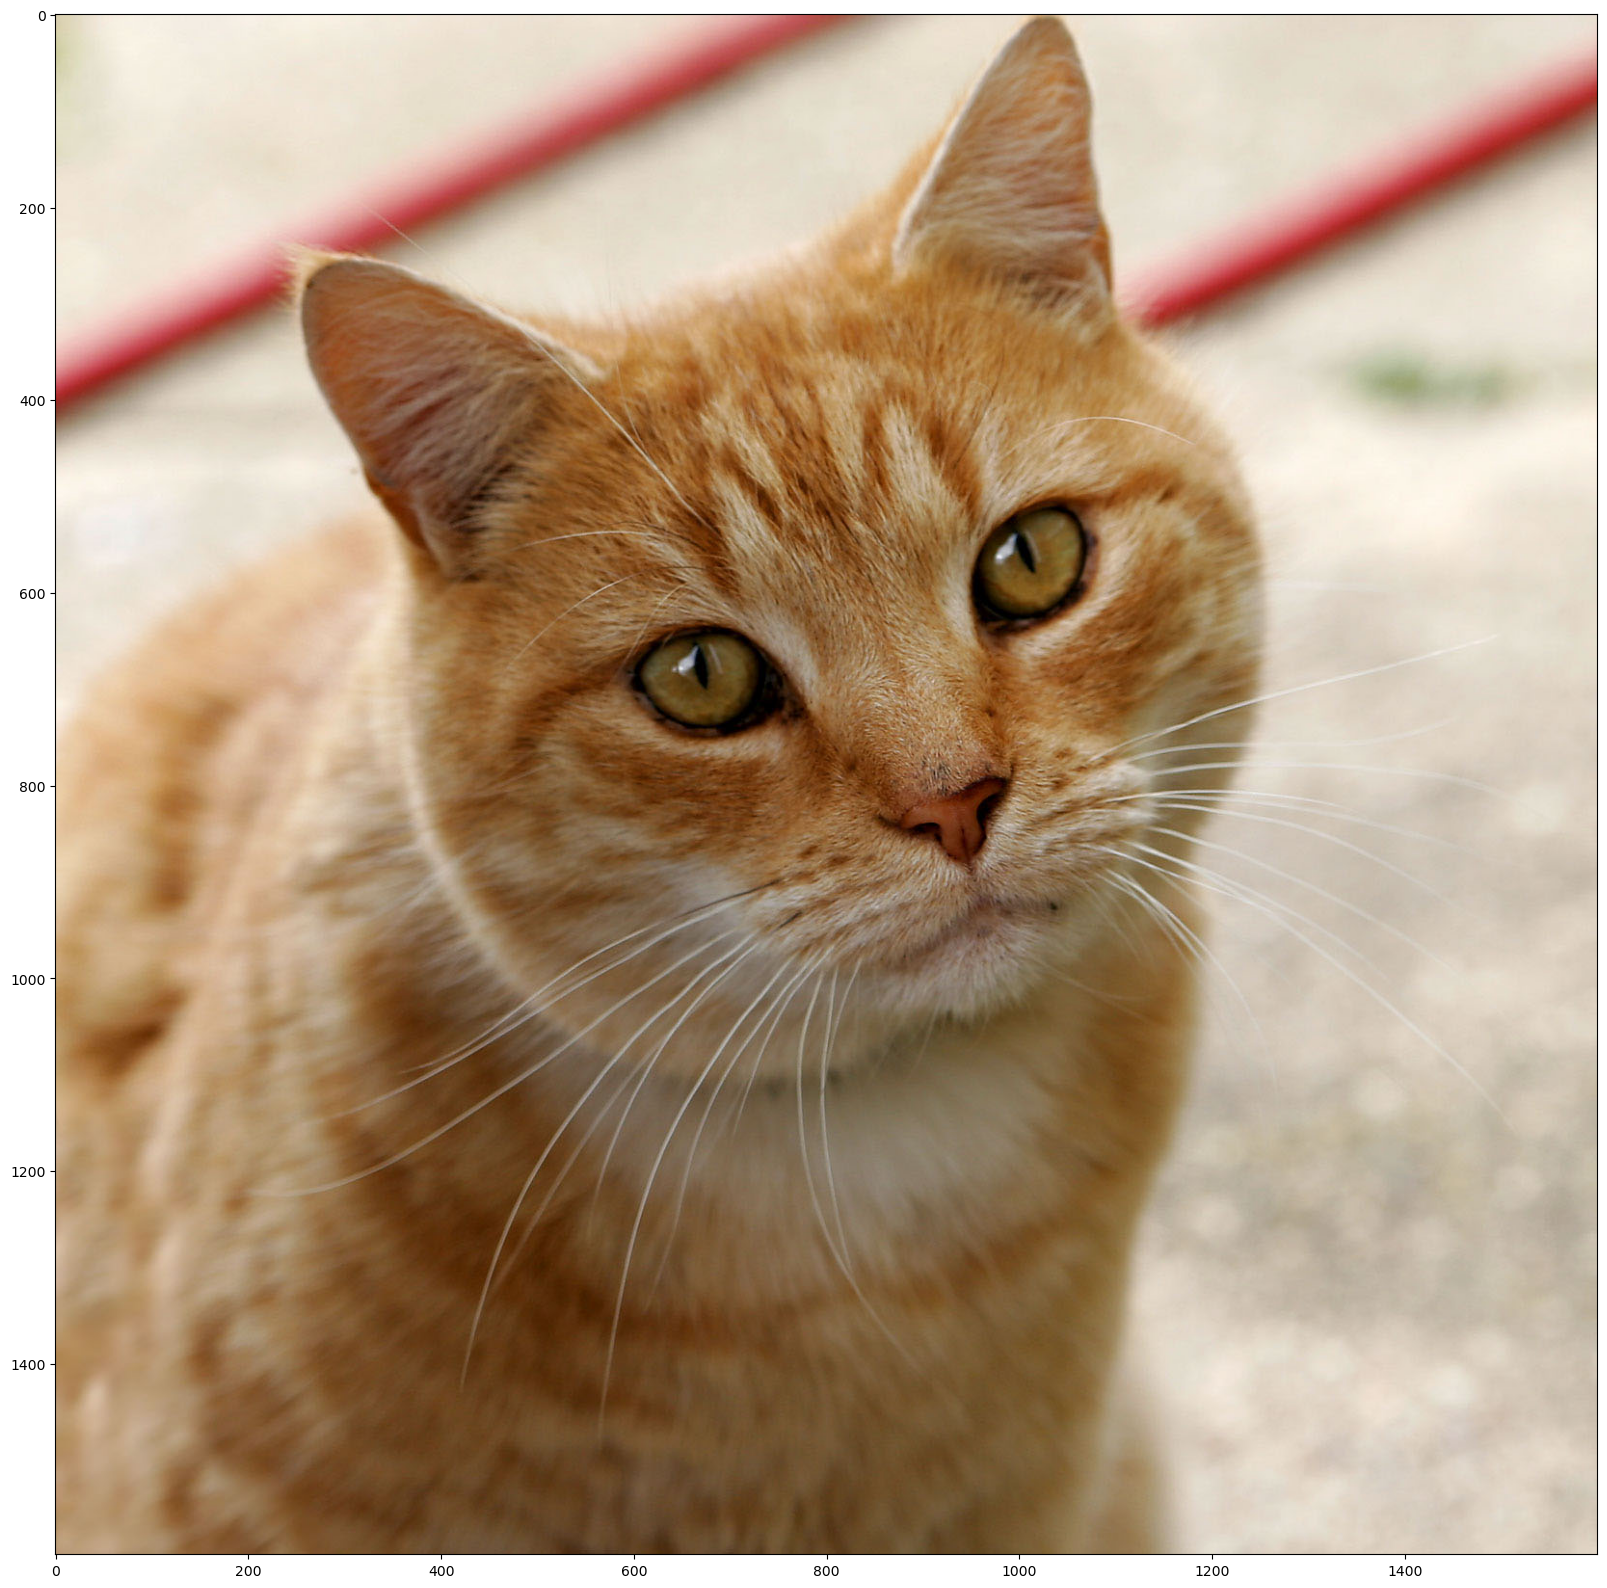

In [4]:
imshow(img)

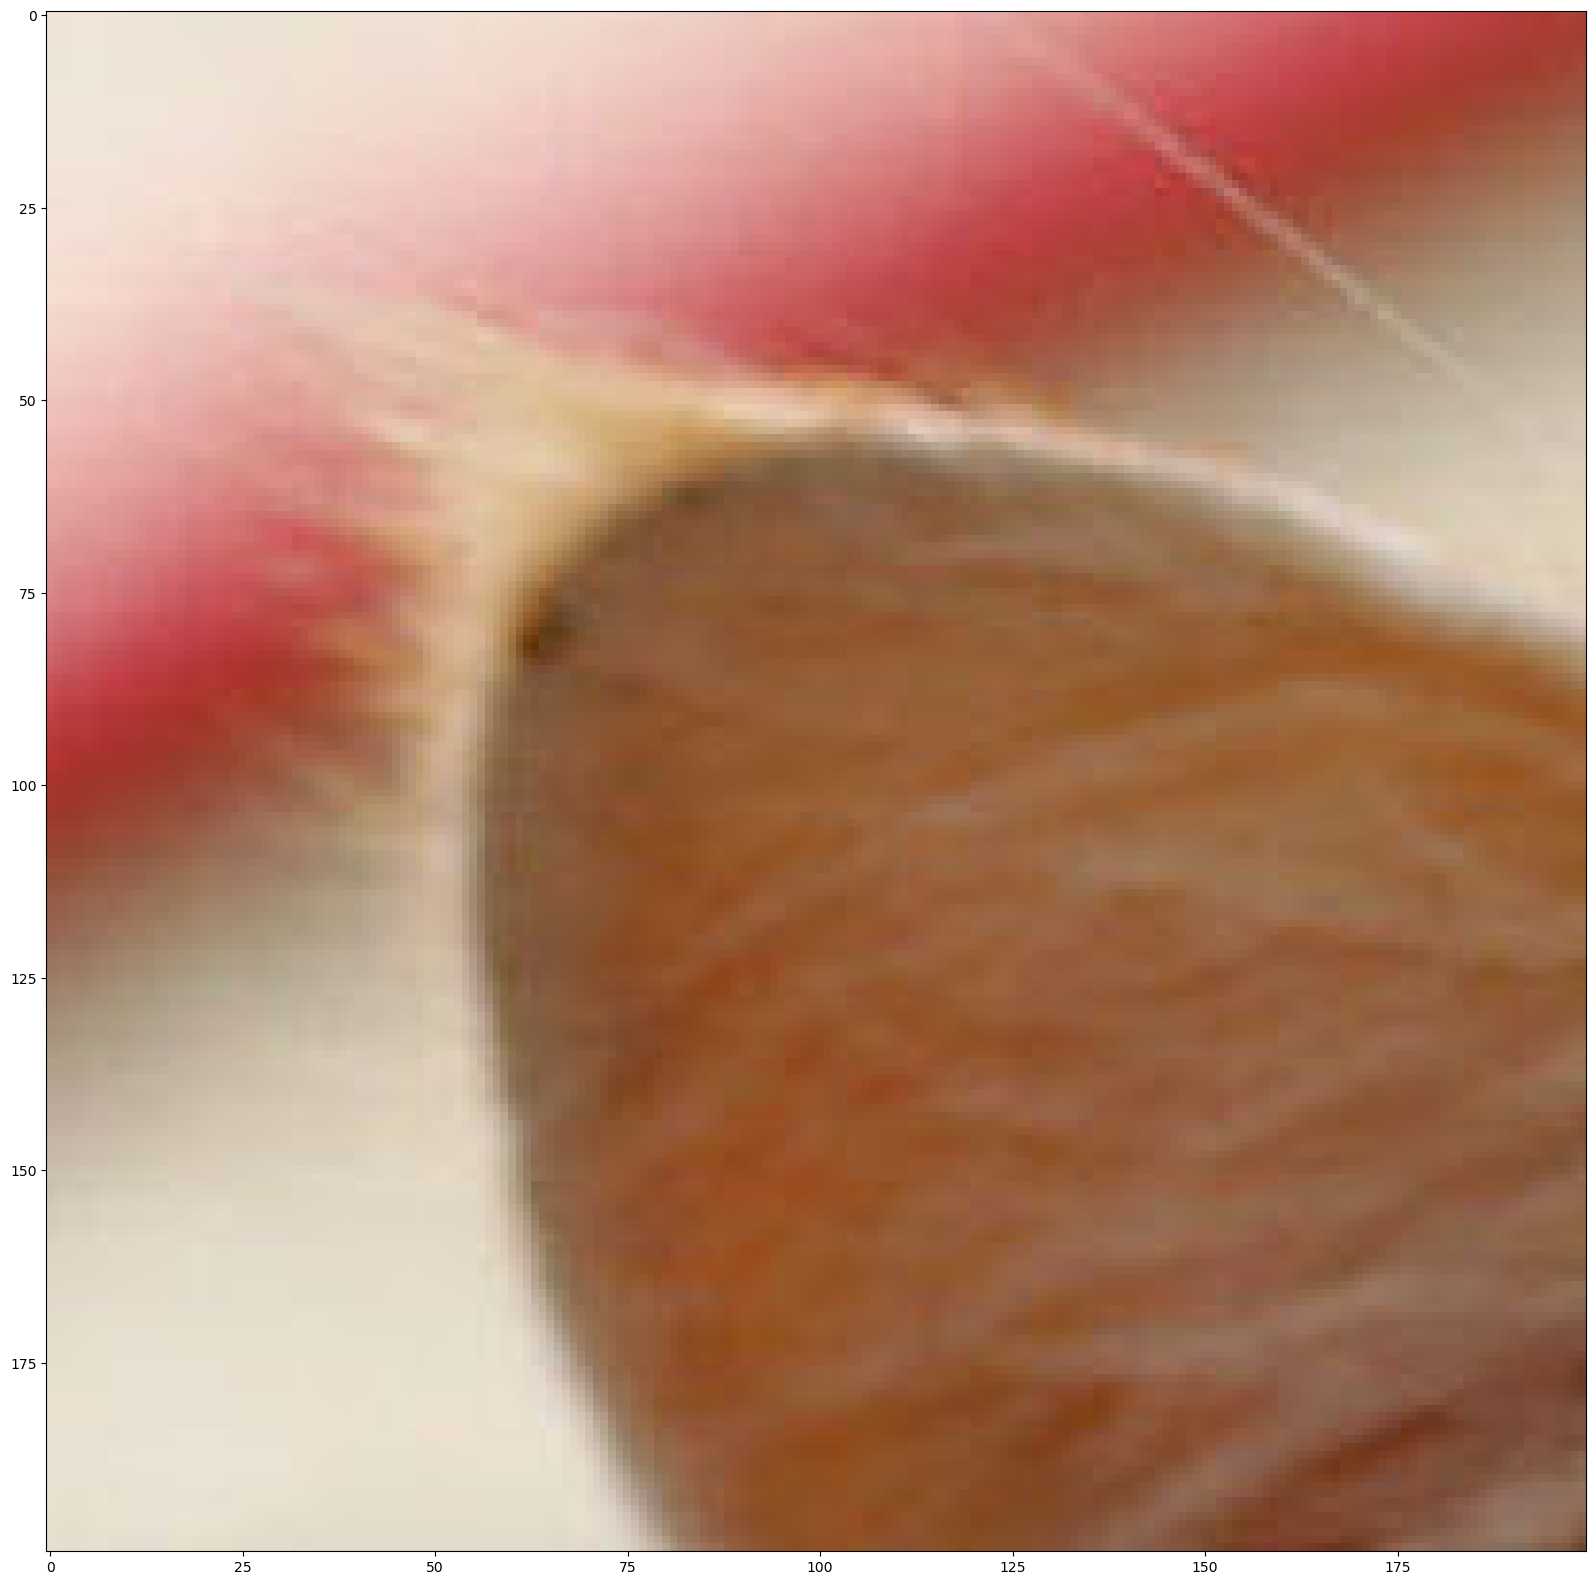

In [5]:
#crop image
img_crop = img[200:400, 200:400]
imshow(img_crop)

In [6]:
def to_gray(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

In [7]:
#convert to gray
img_gray = to_gray(img)

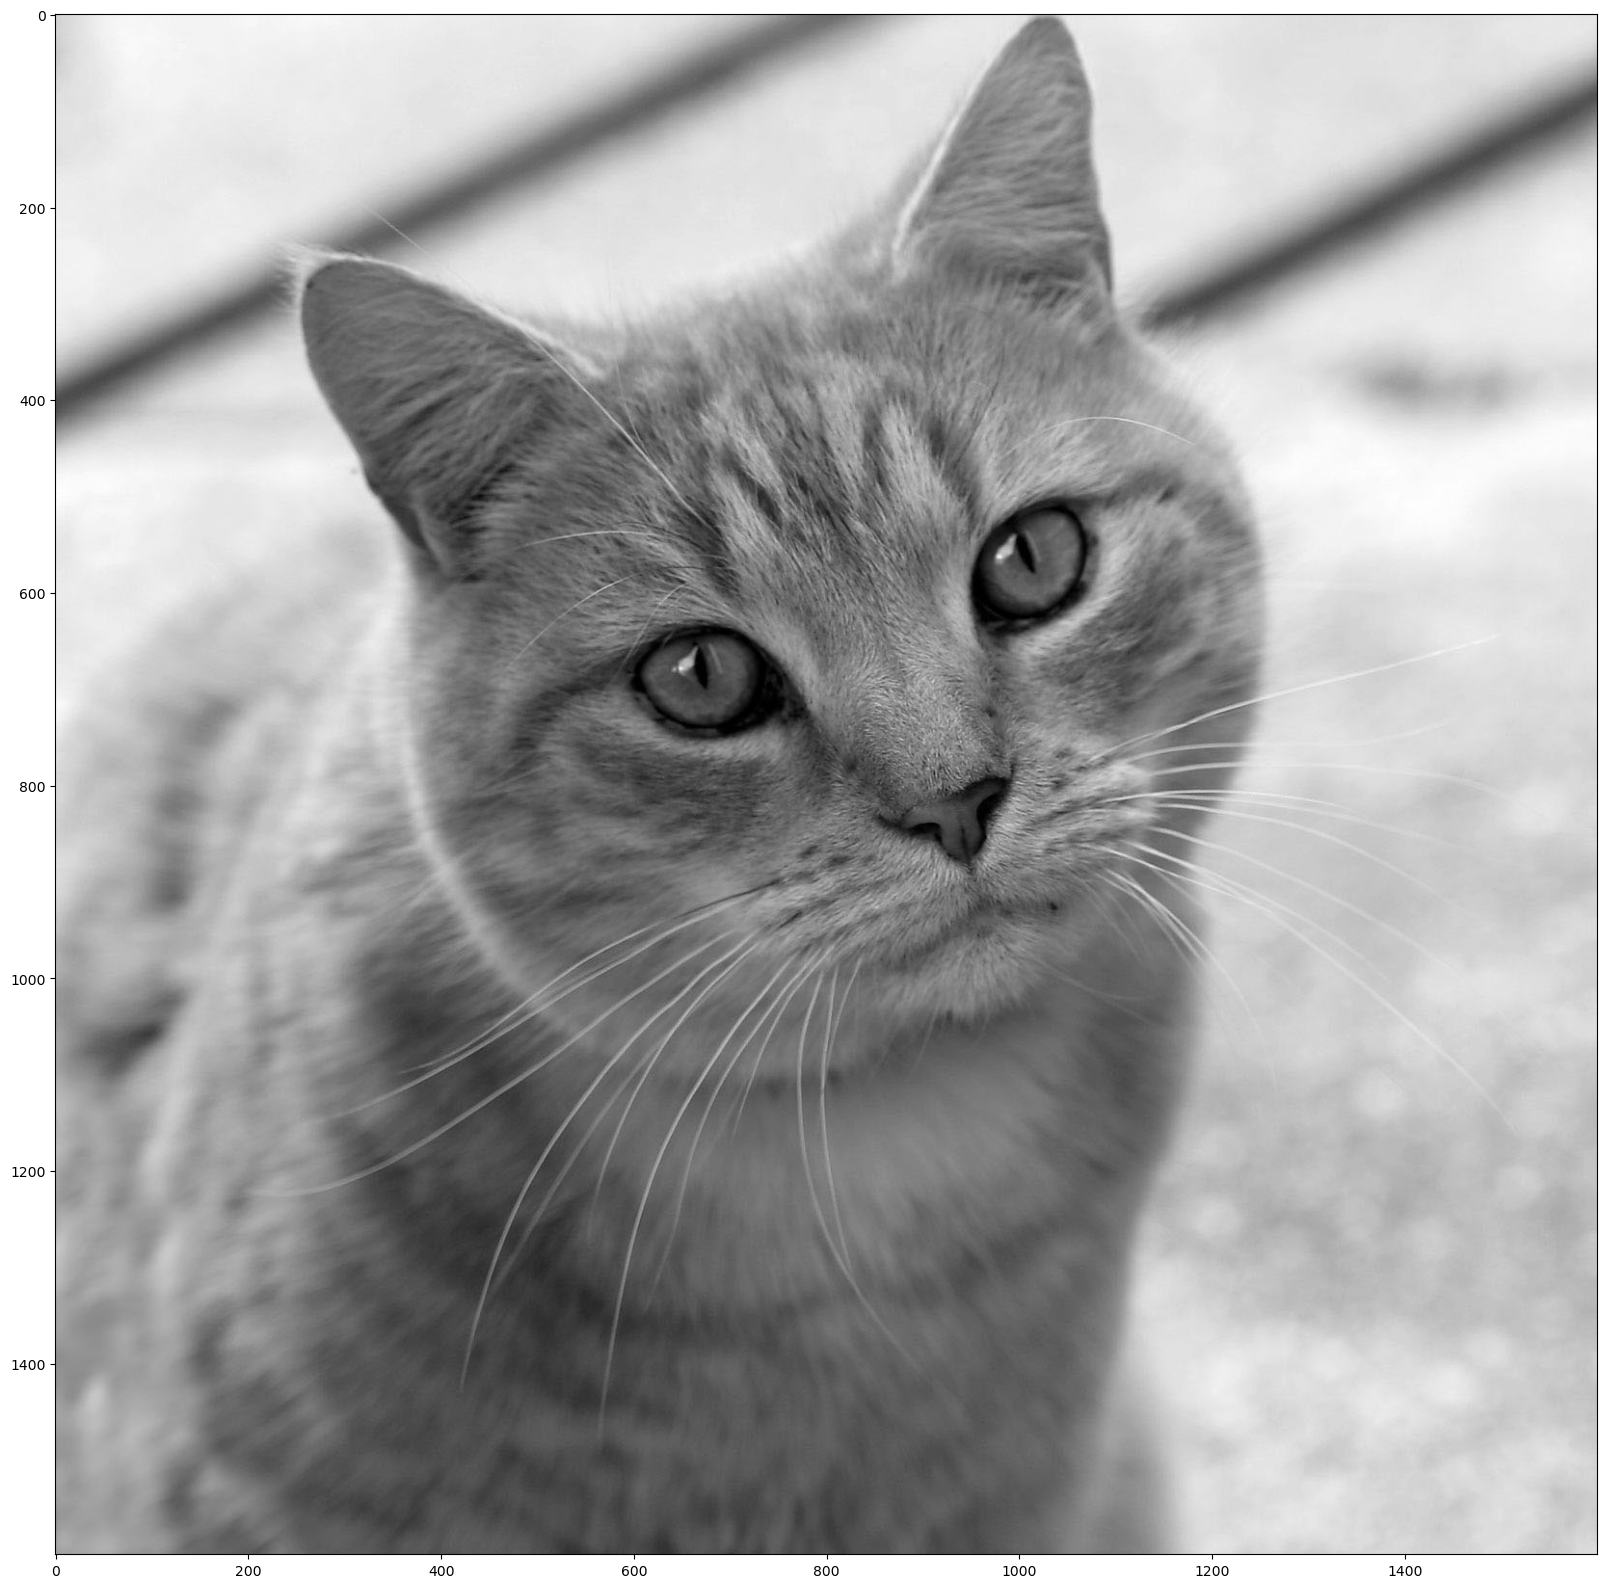

In [8]:
imshow(img_gray, channel=1)

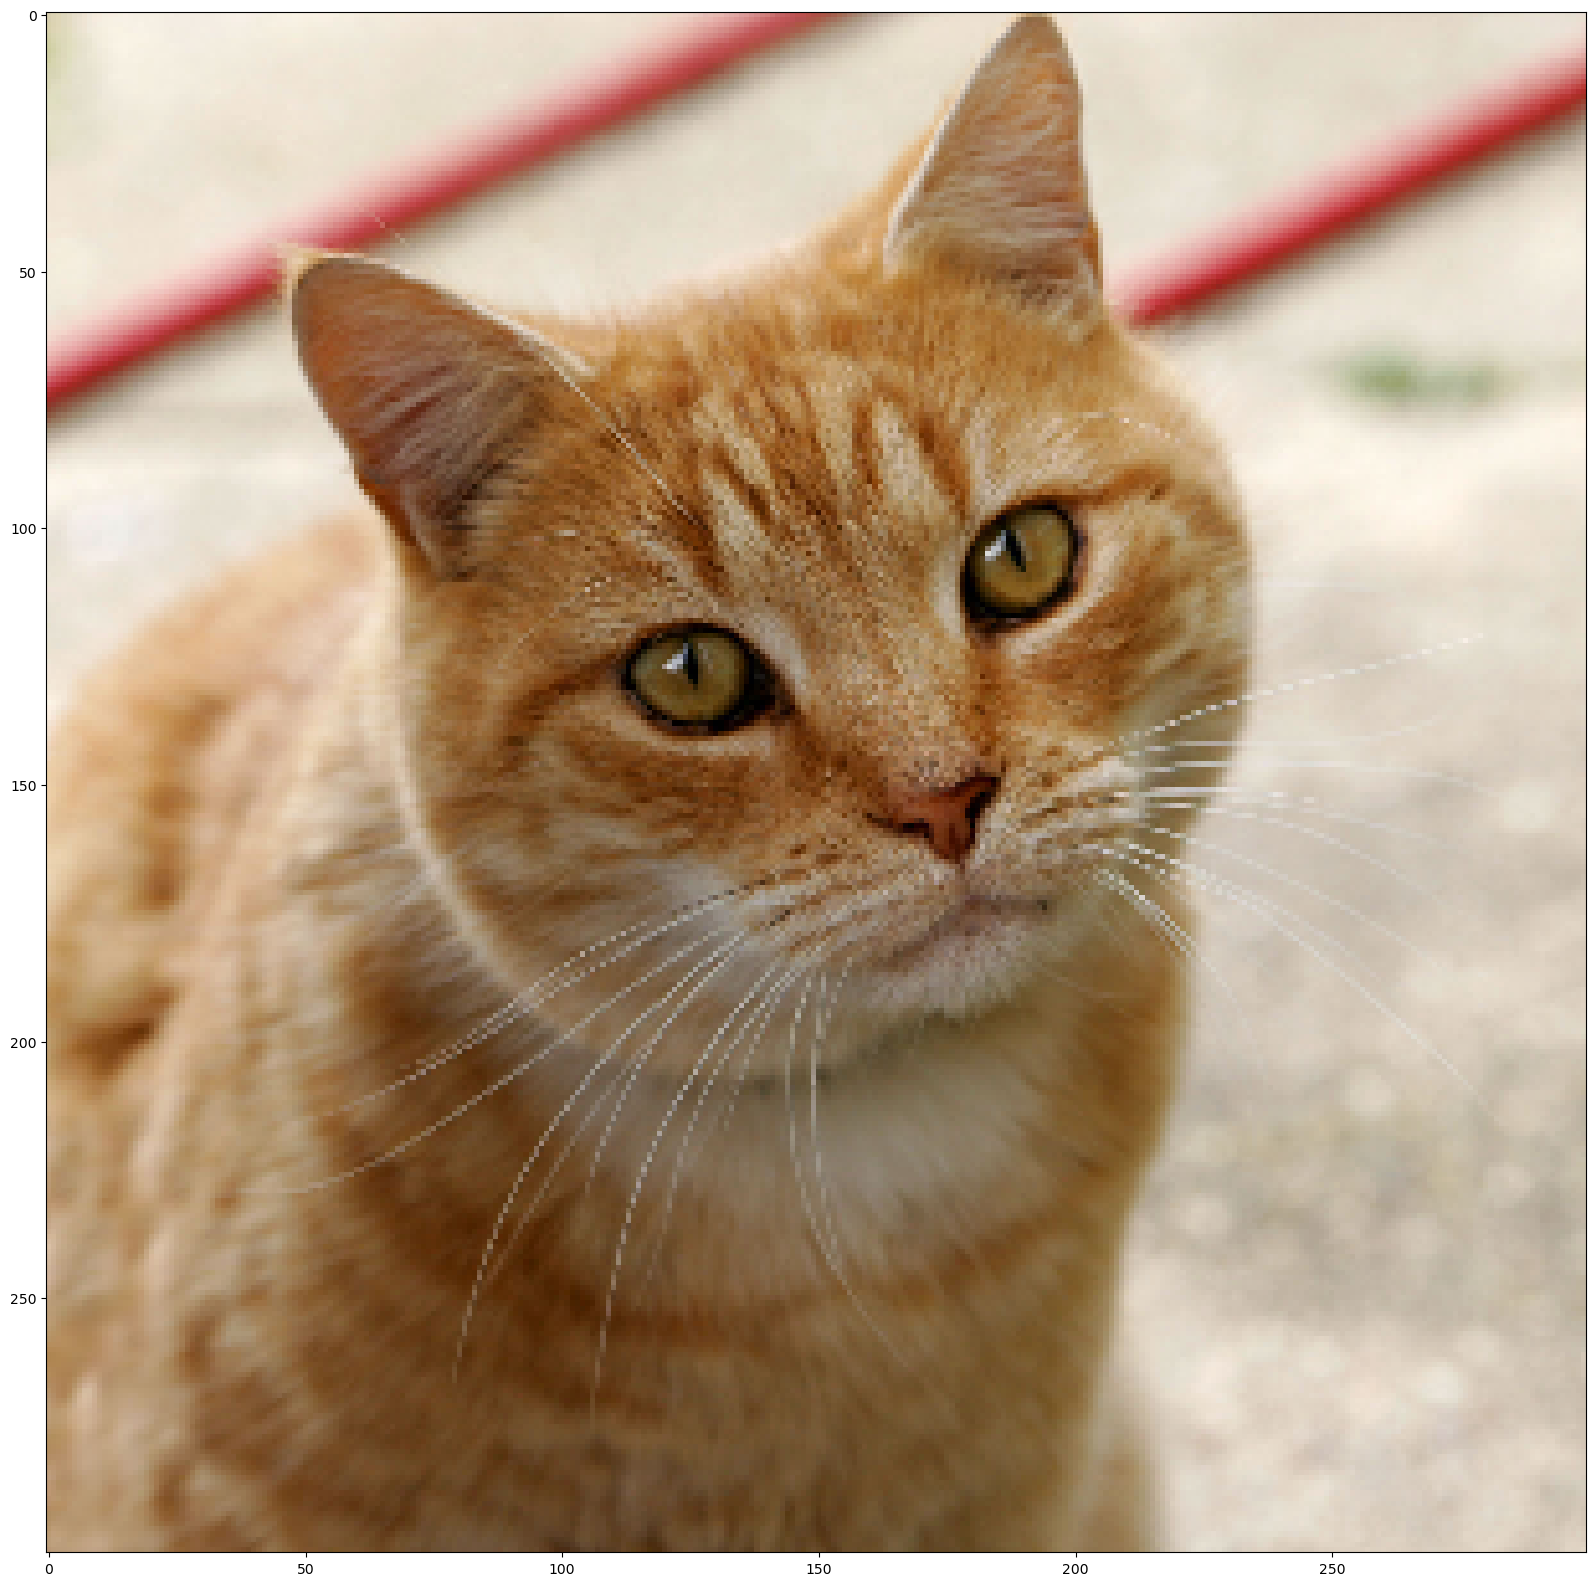

In [9]:
#resize image
img_resize = cv2.resize(img, (300, 300))
imshow(img_resize)

In [10]:
#normalize image
img_norm = img/255
print(img_norm.max(), img_norm.min(), img_norm.mean())

1.0 0.0 0.5823366728835888


In [11]:
#calculate mean and std
mean = img_norm.mean()
std = img_norm.std()
print(mean, std)

0.5823366728835888 0.2474856342790581


train mnist digits using logistic regression using filter of bank gabour filter

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.filters import gabor_kernel
from scipy import signal
from sklearn import datasets

# Load the MNIST dataset
digits = datasets.load_digits()

# Extract features using Gabor filters
gabor_filter_bank = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.1, 0.2):
            kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
            gabor_filter_bank.append(kernel)

features = np.zeros((len(digits.images), len(gabor_filter_bank)))
for i, image in enumerate(digits.images):
    for j, kernel in enumerate(gabor_filter_bank):
        filtered = signal.convolve2d(image, kernel, mode='valid')
        features[i, j] = filtered.mean()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, digits.target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8527777777777777


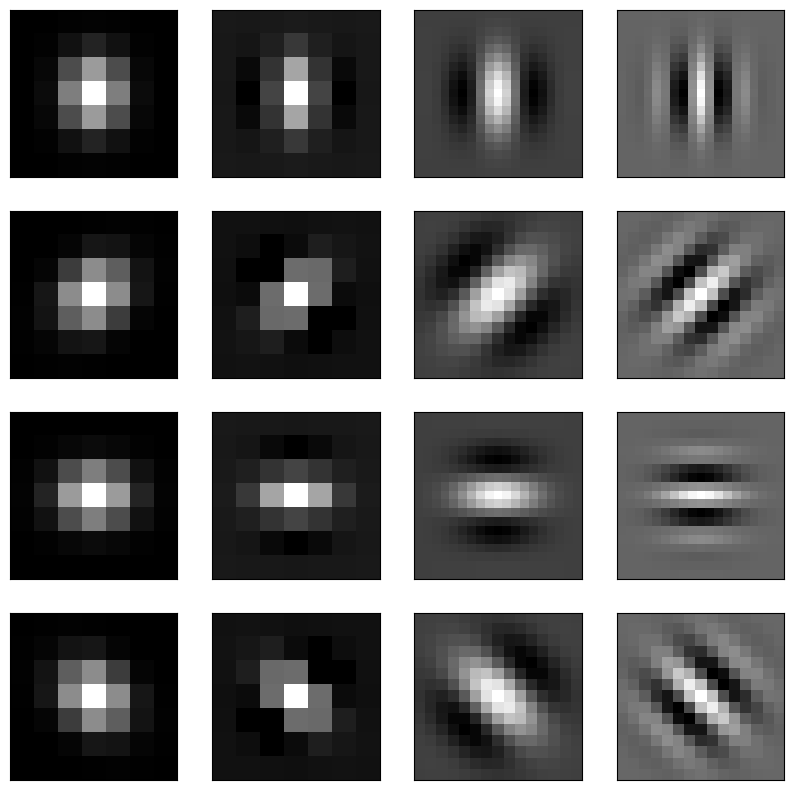

In [13]:
#visualize the filter bank
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(gabor_filter_bank[i], cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

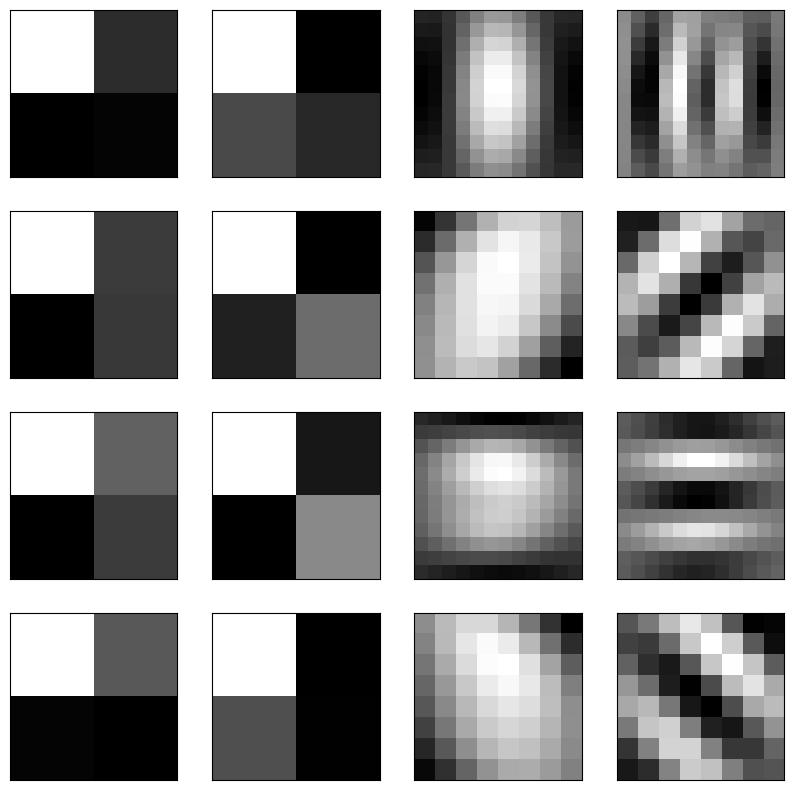

In [14]:
#visualize the image that already filtered
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(signal.convolve2d(digits.images[0], gabor_filter_bank[i], mode='valid'), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()